In [1]:
from math import sqrt, floor
from statistics import mean
import pandas as pd
import numpy as np

In [2]:
def get_coords(address):
    planet_index   = int(address[0], 16)
    system_index   = int(address[1:4], 16)
    coord_y        = int(address[4:6], 16) if int(address[4:6], 16) < 128 else int(address[4:6], 16)-255
    coord_x        = int(address[6:9], 16) if int(address[6:9], 16) < 2048 else int(address[6:9], 16)-4095
    coord_z        = int(address[9:12], 16) if int(address[9:12], 16) < 2048 else int(address[9:12], 16)-4095
    # coord_y        = 255-int(address[4:6], 16) 
    # coord_x        = 2048-int(address[6:9], 16) 
    # coord_z        = 2048-int(address[9:12], 16) 
    return planet_index, system_index, coord_y, coord_x, coord_z

In [3]:
addresses = [
'4191FD931FB3', '41ACFDFFAFF8', '223301D41678', '117200D3F676', '51B8FEFF4000', '3039046C21C2', '514FFF30D0D8', '217AF7D43651', '10320505890F', '101010101101', '6057FE56F3E5', '21EAFDF71EE1', '10069CF8092B', '104A45EA9803', '31E8FFBBEC5A', '3141FFBB2C48', '205CFED3263C', '3089BCC7F654', '40250D3FBE93', '515A0613D75C', '100120200038', '6106FE37AED8', '60798EAE626B', '213F25222222', '20F2849FD2E1', '320406D44679', '300F019FD325', '11E10329210E', '2059F912D6BC', '60DF849D02EE', '20DBFCE25677', '11BB08C79A33', '20119282682B', '2192F74CEB39', '2033FF0AB6F1', '213704C2C5C3', '1149F84CFB39', '50D80503E914', '11F8044B551D', '4001B50002FF', '40F1054AD4BC', '6001B50002FF', '2012FCACAB61', '40BC06964E70', '4186F9557C2F', '201202FFAFFB', '5159FD6A21F0', '315E05615CA4', '52080A40FA9A', '416905A0A335', '303C9ED4F14A', '20A5FAFA376C', '20B503259801', '110F07D3B9BA', '603DFA987DD0', '31E0F8FFEFFF', '6232FF988DD1', '102108AB9439', '6097F9555C2F', '2132073685D3', '319007FAB674', '201E01415592', '108BD8DA871A', '404A0A49EE59', '107F012006B0', '205408DA899E', '200202FFDFF2', '6047FA41BA6D', '50EE00FD090F', '41E0F9558C2E', '2104FF29C801', '6104FF29C801', '20520121E66A', '301500C61512', '407AFABA7AD8', '3087075DA391', '107CFDDCB969', '21A6FB9AC28B', '41C804961DDA', '217C046F4F99', '41E7076C61DA', '31980797B20A', '208500A233E2', '3162F99251B6', '2005F53DC5F7', '207BFE01DFCF', '6001041C9819', '2001041C9819', '512E0000D110', '207AFE6F2115', '11DA03553488', '311502F94701', '121D01BB7ADD', '206901304658', '305F096A2109', '30D990FB42FD', '50E9F8ED7949', '30ADF8EDB94C', '20F0F8EDB94C', '322DFAC085A4', '11C2F91A9961', '117D0497A2A9', '204103480514', '107DFF58245F', '31CB033D35D3', '1001F8FF8008', '200032420132', '503E0A80C64A', '51A4F9FEAF67', '50A800094701', '21E1FE918EBE', '41D6F0BD3E26', '6185F9004FFC', '212C01D7268B', '31F3FFF29E10', '607904F68672', '207903FFE009', '40A4093D3C10', '41C8EF6F3032', '219BEF6F6031', '20DFEF6FA02E', '40EB076B3E76', '202C002DA61F', '4068002DA61E', '4182032DB61D', '3182032DB61D', '51BD042DC61C', '2036F7BAC53F', '404CF946CAD7', '209701ED1966', '1098FCCF263B', '213BFE9D1CB1', '5129E2004FFB', '1129E2004FFB', '205AF970B02C', '405C0A958F08', '108AFD0D3927', '21CEE770600C', '604D0363EDC3', '606BFF5DFC23', '114E016DD181', '20C302600C99', '30A3EBF88739', '11D7F03CE5E2', '100EF8992DEF', '20C6FE64FCE6', '3037FE707030', '51C1F9671250', '10470497500A', '600D07BD156F', '301EFA002FF9', '20C5FE38560B', '607A0A538465', '11DC05FFB004', '3166FA17C6B3', '4011FB4D4500', '1136F4FEBFF2', '514D059DECCB', '409BFAB88AE2', '4145FA664D79', '515D005C5C71', '3008F70DE6AF', '1172FC005FFB', '404B003809FC', '5043F7C13574', '200D062949A0', '11EBDAF59DCE', '3062FF50808C', '1200FF50808C', '11E3FE409584', '617BFB95BF71', '513FFA41A58A', '210502007FFB', '109FDADBDFBD', '6025035094DE', '3023053879EF', '213D01F5C930', '10260D890DD3', '30ECD6610D42', '5049FA3FA7E6', '1047F86CAF86', '210AA15E15AC', '11DDF9ECF939', '40A5023A35DA', '209C191D1D22', '10F3FD095703', '10E099B07135', '2146032D1664', '5091FC5274B2', '5044FE3B65ED', '401102D3B9DC', '41EDD560FD40', '109D01D4C67D', '2104FC2D69A1', '1089FBFF9FFB', '2039FC70502B', '31D4FCA6C417', '3030FB6901DD', '216D076D2149', '20C30914D95F', '105CEEF7F739', '204C021726DD', '200CF670801E', '2022066D314B', '307AFF5D8382', '503500281B10', '41EEF570701F', '1012F6706023', '109CC20EF56E', '60B7F36FC02B', '20A006694189', '319B046D314C', '116FFF362559', '31DB9AB09139', '20D3FAAA315F', '21F00137F9FC', '501708951F0D', '215104A9046E', '507100B28B71', '103F00D7168B', '4031F6543C3F', '101600006006', '11AD029290A8', '31710797F20A', '2049FA94C188', '4203FD007FFD', '41A1742A01AB', '210F00D7368B', '10E2F26FD030', '30EA07DF368A', '41D8F628E154', '3030FA12F394', '3186F8E6B94D', '61C3E14612CC', '202EFE509B8D', '607AFF003008', '102E041396DF', '51C709E64966', '109D7F26D209', '2142D27FF44A', '100808E64966', '3192D87FF464', '11BFF0AFEB64', '2178054AD52D', '318302BBC4C0', '2111FE509B8F', '404F0348053E', '117DFF343632', '11AC057FDA12', '6001FEE52673', '20A6FD2AB661', '41C3FC027929', '317503D5C671', '212DFE6F7F27', '21E5FE6F7F27', '318F056CAEA2', '406104DB4968', '20CDFC163923', '114EF9690DF4', '2135FAF5F6BF', '41D4F91C3971', '600EF74FA47F', '107AFE1EB67B', '4118FE50BB8A', '216E060E86D2', '200402B4752C', '4026010946B3', '214DFB4894AE', '501D08C9F5DD', '2160027F2A15', '114B037EFA17', '61280BE67962', '61C01433C623', '2208016BB019', '2065027F4A16', '313A2732D60F', '31C2046F304B', '5065027F4A16', '40500540C5A7', '11CC037FCA0F', '11CBF79D029C', '113DF79D029C', '506F63982FBD', '1051055F2C70', '200B055F1C70', '4102FDCFA5C3', '405AFD18A6D3', '10B5018F9027', '30CD728027B2', '50E4F1368094', '101AF7A57C35', '5079B8801537', '40ADFFA2E3E9', '41073B06CC4D', '404BF84DAB47', '620B01305658', '21F8F95EBCAE', '609304A4A414', '30D3FA5BDC05', '300B03992D48', '60C100A71F52', '11CBFB004FFB', '6193E3F8A736', '50DC041F9952', '107AF93F058E', '3114FDA2A3C3', '1102F950DB87', '21DE0627167E', '511601A9E482', '4013ABB8DF88', '507E08992214', '4133FD6A7F88', '500F08611CF8', '2112FC50BB8B', '6005FC50BB8C', '2005FC50BB8C', '50350569220A', '11FAF9555C2F', '21E51010D10C', '1035F82709B1', '111D1ACE7512', '40F308E69967', '40F308E69967', '502FF643858B', '1046FF468AAE', '110AFC4E4B3E', '205F0292C1A0', '401300696F46', '20FE005C9285', '213D0941A7D7', '40C1F8AC044C', '307A0B94E0C5', '21C90526E67D', '507500FAB046', '21500CE21691', '310707E65500', '1047B581EA45', '416FEF3D95F1', '607A03B133E4', '4188F6004FE4', '21D504AA943A', '203107F15934', '5037F9C59A39', '1032FC3A05F1', '4001FF922176', '3194071B5964', '217F014DE510', '21DFF914C6B1', '113812E53683', '103B0003BF40', '2114FE47656B', '106542B84747', '5016034BD3DA', '11600863BD5F', '314C43B8D743', '107A01E3D6CE', '218601BFEA56', '51EFFE9922DF', '5178FC9912DD', '122DFE9942E5', '4079FE9942E4', '607682F3B423', '512BFB007FFD', '41860360E387', '2039039822B8', '3122FAFFF006', '31E2FF972D78', '20EDFA001006', '309E049561F8', '207906596C31', '20FB039852B3', '520301B214C1', '421664141236', '1078F73D3A73', '119B0196DD78', '912EF7D429C9', '40808B89715F', '21B7F9D499CC', '20FD04D41677', '200FBCC7E655', '2089BCC7F654', '20FCF0643DF2', '21A7F9D499CC', '2082FDFEF008', '1073398310F8', '20B0F96C2F4F', '20040A9EBEE6', '10040A9EBEE6', '108A02FF9FF6', '511C05D85605', '21EF06622329', '21EF06622329', '403D05D85605', '105D00A87ED5', '2017014AAC05', '3198084D5B45', '20050A9EBEE6', '21D2E756CC1A', '3165FDF586F9', '4165FDF586F9', '1111EE54CC25', '1111EE54CC25', '108307546BB5', '20801758FA31', '11F8FE67D30B', '2130FC5FF385', '207998CADF18', '51D2E756CC1A', '11D2E756CC1A', '207E099F1D10', '203604236B6A', '5054F13309F3', '30AA03FE8920', '410FFBBC5A86', '1053FFEA46A4', '103DFDFCE6FE', '20BF02122914', '3190075F8307', '1070FF40DA73', '31560E9FA35C', '1083BDC7C659', '2083BDC7C659', '11930116F06A', '20790016F06B', '21CF0116F06A', '10790116F06B', '20F50117106C', '113ABBA41F23', '11E09AB09139', '615C00B7852F', '50E8FEA6C443', '615C00B7852F', '20F2FDA54417', '418701B50C10', '118701B50C10', '21B701B50C10', '50F701B51C0F', '509601B50C10', '216C01B50C10', '11A101B50C10', '10BE01B50C10', '201E01B50C10', '201C01B50C10', '101B01B50C10', '606501B50C10', '1171FB4E7B13', '6200FEB91CB5', '3102D278A50B', '1183FA555C31', '209BFA555C30', '20FBFA555C2F', '20F900FF7000', '5203FAC9EED6', '200110210111', '200110210111', '200110210111', '200110210111', '200110210111', '200110210111', '200110210111', '200110210111', '200110210111', '109AFD961EE9', '2177FF1D16B9', '2020FC213950', '615C00B7852F', '615C00B7852F', '213F08E64966', '41B61A52A046', '321905417A6B', '114CFE619C8E', '412C0B4587B2', '11E50E4577B2', '11E50E4577B2', '10F2FDE38670', '205603D039D0', '120EFEC555B1', '10FBFDC575AF', '20A5FCD0564E', '205BFB56ABB7', '202000446A6A', '10DFFD1316E7', '20C5827FF26F', '3041F8008008', '30BFF5419573', '200204D40679', '51D2E756CC1A', '21D5056EF052', '11D2E756CC1A', '11CCFEFFA005', '41B9002D7A02', '31C40F00407E', '20F3002DA9FD', '10F904D3F679', '10F904D3F679', '10A905921F49', '203002D60643', '102D002D99FE', '4188FFD3C673', '103D233461FE', '102D002D99FE', '109510004097', '11E7F0FE1B1F', '10DF002DA9FC', '4053083AC5BE', '1054FF925F1D', '1054FF925F1D', '102DFF925F1D', '102DFF925F1D', '102DFF925F1D', '102DFF925F1D', '2072016B407B', '11C9FBD36675', '115BFAD36675', '1079F9005000', '3121A2DED649', '1096A915477C', '120A0392DE7D', '41F3FAC785E1', '1110F9555C2F', '1110F9555C2F', '1110F9555C2F', '108902D5A64C', '11CAFF926F1D', '1049FF925F1D', '11CAFF926F1D', '11CAFF926F1D', '10F204F1D6D6', '120A0392DE7D', '110EF9007000', '110EF9007000', '1199FF925F1D', '1199FF925F1D', '1199FF925F1D', '40C50B4D83C4', '109485F8635E', '209485F8635E', '209485F8635E', '209485F8635E', '11A202D40679', '1172002DA9FD', '111705D49675', '111605D49675', '111705D49675', '107601D3F678', '1173F600F002', '11B4F4015002', '1008AC5BA081', '11F9FF925F1D', '11F9FF925F1D', '1003FDFF5002', '1052AD5BD080', '218F02D57650', '30CBF4019003', '10CBF4019003', '10CBF4019003', '21460004A691', '113F0D927B1A', '20BEF4FF7FFE', '20D9B2434333', '20D9B2434333', '108E02BDBC7C', '208C025B8C28', '4032FAD269B5', '12020CD787FF', '11B502BDBC7B', '6086FFFC5706', '10290021094D', '107D320BDB62', '115CFD0A0FEF', '105F7D7F4804', '21310242CB61', '200A11D807FD', '2059034E6B07', '108D034E7B0A', '104005D64663', '3076FC468AC5', '10460244BB3E', '107423346201', '105F0552D498', '110E02448B41', '11E2BDF73657', '1066FF9F5370', '211923346201', '122F02450B38', '511923346201', '10800247CB0C', '10B9B490BF45', '11FCBA90CF44', '2029034E5B06', '5152F9A4DC33', '313CFE44258F', '104AFBDE67BB', '6008FBDE67BB', '106D624713ED', '3074FBE0179E', '31CFFBDE97B9', '106D624713ED', '210EFDE023EF', '3201FBDF47AB', '206FFBDEA7B6', '5023FBDF27AE', '117204FFAFFC', '2106100030D8', '1073FDD67982', '50780411267F', '50780411267F', '503A04112681', '503A04112681', '10F6002C9626', '114B016E7F1E', '206C091E8986', '20ECFDE936DE', '21ACFBDEB7B4', '2090FBDEB7B6', '103AFEC58A04', '1074397FF666', '1031397FF665', '401FFBDEF7B1', '102D397FF663', '113DFA587BE2', '200A07A90BD4', '6020FDE936DC', '511F034F5C9C', '503A04112681', '20E904112681', '107AFFC1CA61', '20E904112681', '20E904112681', '1156EBA8EC50', '410504112681', '110504112681', '1177FD091961', '1012FD090961', '5023FBDF27AE', '41B9FBDF27AE', '110504112681', '410504112681', '501506458541', '10CA0DC1E9DD', '419EFBDFD7A1', '410504112681', '410504112681', '109DFA9E02BA', '1059F063FDED', '3150198EA08A', '1107198E908A', '2001198E6089', '2019FEC57A02', '2183FBDF67A8', '10B712BF09B8', '10FC0FBFF9C4', '118CFD090961', '103DFD090961', '21A0927E5D6F', '3104FBDF67A8', '10D1FBDF57A9', '30F3FBDF87A8', '4174FBDF87A7', '1170397FF65A', '110DFDC57A01', '107A0725A66D', '202DFBDFB7A5', '4179FBDFC7A5', '10EF644603DE', '10EF644603DE', '413CFBDFD7A1', '4010FBDFD7A1', '50B7FF008000', '408304112681', '5053FBDFD79F', '108504112682', '102EFD997E5E', '208B04112683', '3109FBE0079E', '420AFBE0A790', '11B324973B3B', '21B324973B3B', '4196FBE06796', '2119FBE0279D', '208B04112683', '208B04112683', '1044357FC640', '413C357FD643', '108B04112683', '108B04112683', '1073624713ED', '108B04112683', '208B04112683', '1083F809D960', '317FF809E960', '109805FF8004', '1012F1BA5AD7', '116104112689', '216104112689', '218AFA6A31FB', '216104112689', '216104112689', '21B324973B3B', '21A9732A81A8', '10B29282582A', '112EFBE0479C', '112EFBE0479C', '50F2FBE04799', '307DFBE05798', '1040F75FDCF5', '1075FDAE0B3F', '1075FDAE0B3F', '111E03A213D3', '1152D7DA297B', '105CD4DA1979', '111ED7DA397A', '10BFD7DA397A', '21AD377FF650', '220A357FD643', '11B3377FF64E', '1042F1CF1FD4', '30ED357FC63F', '106D377FF652', '40970411268B', '40970411268B', '40970411268B', '10AF07888360', '4171079C7D80', '11D2FEA6D441', '11D2FEA6D441', '41CD02652263', '3149FDE936DC', '51600988035A', '10920988135B', '111BFEEE66B5', '100AFD961EE8', '31E60888435B', '40450888435C', '109799AF713F', '10C2F2A13E69', '10F498B0113F', '118E99AFC13F', '1068014A8542', '1012018FAFC2', '50DA001536C8', '5034001526C9', '11BAFEA72443', '202D019A4266', '202D019A4266', '11420788735E', '60EF06890368', '118E99AFC13F', '11D697B0613B', '20F901D7368B', '1130F09A5E49', '501FFC9E32C2', '2193EF6F0036', '11C6FBD8B846', '202D019A4266', '11CD02652263', '1134FB98CE41', '11ABFB98CE41', '201FFED7068A', '300700D7468B', '10E40688F367', '4048EF6F1033', '41AF0788C362', '10B7FFF1CDF4', '1015003CDAB0', '407908964E6F', '107908964E6F', '31C8EF6F3032', '121DFF98DE40', '109EF91EF679', '217D07AEF4A7', '10A7FD213950', '21136F7EA52D', '11CD02652263', '20500430D646', '119E1ED87B27', '10D80688F367', '109303D84D25', '102B03D28CC0', '20DFEF6FA02E', '20B6EF6FA02E', '1145ED954FE0', '1117EF6FC02E', '20500430D646', '20500430D646', '60F40589C372', '11DE06894369', '400C0B957F06', '1177FFA6A440', '104A013C5CF9', '202E0589936E', '21D80489E371', '219DEF6FD02E', '61B5001546C6', '103E001546C6', '120603641CF4', '10E3FFA68441', '213E01A68441', '107A00E2DDE4', '111E00E3ADF2', '20D3FEDC8670', '51940589936D', '102B076B3E74', '20AC0689B371', '20370589C372', '320B03A6A42D', '10FE010BA902', '11D1010BA902', '10BD01470152', '211AF170302E', '204B0489D372', '30520589C371', '20370589C372', '20370589C372', '11C097B0613B', '116D43F557FF', '10EB02DDFD8C', '105001E0CDC0', '207906948E4B', '10F01F8E2F3D', '302706945E4C', '117A06947E4B', '204C06947E4A', '11DFFC4B1021', '508606947E4C', '10A6E4ED9FF0', '3087F7D919D2', '305B0153EB48', '2207FBCC9A20', '10D2F9109942', '212558742104', '4050FDD7B66B', '4050FDD7B66B', '1111FE0A30E6', '40CDE2DBCFC9', '10E8FEF8F801', '10D5218DFF3B', '107F1F8E2F3D', '10E31F8E2F3D', '41531E8E5F3D', '319282983C2F', '310282983C2F', '11EC0693BED3', '11CFFBD7B66B', '21AD9E982C2F', '1169FBD7B66B', '116F041246B1', '11160D836DDE', '2045FF0A66CC', '11FA0D839DDA', '2158D67FF48F', '11CFFBD7B66B', '5026F995EE14', '100A1D8EAF3E', '10631E8E6F3D', '12091B8EDF3D', '100A1D8EAF3E', '400C0498D1B2', '400C0498D1B2', '11A20D840DD9', '20C00D841DD9', '1154C410BF51', '1154C410BF51', '103102B6DAB9', '10C90E99E245', '108F0C848DD5', '10AF0C847DD6', '504D03945E12', '504D03945E12', '10920934D5D9', '104308EED951', '11400A84ADD2', '11EE0B84EDD0', '11FE0B84FDD0', '10120296BFD7', '400C0498D1B2', '400C0498D1B2', '103F9282782C', '116408EED951', '206F0C852DCB', '206F0C852DCB', '12091B8EDF3D', '50371B8EDF3D', '10F0FAB30B05', '1213C410CF51', '107A11848DCE', '31C80264725B', '31C80264725B', '10371B8EDF3D', '105D1B8EDF3D', '10DC0EC2AA6D', '20F704BBC4C1', '31C80264725B', '31C80264725B', '1166C410DF52', '113B08143952', '101D0402216A', '115908143952', '11300D855DCE', '11A90E859DCD', '20E2E1DBEFC4', '11D1099E7D21', '202D04A84C10', '2075080A26A9', '10A1080A36AE', '11060E85BDCE', '1223050C26CB', '1120E1DC0FC8', '1093F79CCD79', '20510E85DDCD', '11FA05D6D685', '1056C410CF52', '31C80264725B', '110F02655265', '10BDFB1D6EC4', '10260D865DCC', '1053188F4F3C', '112A0D868DCC', '1021049461C9', '108202653264', '108202653264', '10E9F2543C43', '2018F2542C44', '100213907F43', '31FF178F9F3D', '10F91086CDCE', '103C05D6C685', '103C05D6C685', '10BB006D4094', '207A2C7FF5E7', '11A82B7FF5E3', '303F0DA95B9A', '501103F04656', '120100FA68F4', '1082F5626218', '4099FDE936DC', '10DCFDA8D476', '118645F3F7FF', '10B600FA18CB', '104BFF509B8D', '1079FE3B95D4', '20BB07BBC4C0', '1023F662921A', '2005FC6C31B0', '206AFDA95476', '102CFDA95476', '10C0F562A21F', '11C1FF443AE0', '108E7D8012C9', '10CAFE444AE1', '104BFF509B8D', '11FE2D7FF5EE', '1114FE50AB8A', '3153C810EF4A', '111F00F9E8AE', '3079F5B6C51E', '30A2FDA95477', '1035FDA95476', '3079F5B6C51E', '10B70897B1CB', '203D061216B2', '1047019A3D03', '102AFDA95476', '103A00F9787A', '10310AB2807A', '21B1F5F9B6C7', '111D01419517', '31C3019A3D03', '11B1019A3D03', '11F70168FE86', '11F70168FE86', '11CA47F3C7FF', '11E6218DDF3A', '10E100F9285B', '21CF019A3D03', '118AD67FF491', '21CF019A3D03', '10FCC510EF4D', '103C06B8ED3B', '106300BEA58C', '10FCC510EF4D', '1041FD92E0DA', '41CB05949E4E', '11C701F8F832', '4050FDD7B66B', '4050FDD7B66B', '321F9A981C2E', '10F901F8D826', '1044099A8243', '11E0064E4B07', '3002FADAC980', '3002FADAC980', '109DF2310088', '222A054E6B08', '1157054E5B08', '107806FFAFF5', '10B0FFDE86B6', '10B0FFDE86B6', '1005F6558C31', '201007E6496C', '416C00030005', '11B3054E6B08', '108506004FF8', '311A06FFCFF5', '30E100FF4FF5', '102CFC07C012', '102CFC07C012', '20F8FE5324AA', '10DBF90E7025', '10B0FFDE86B6', '3143F9DAD981', '10F90638CA01', '40E0055334AB', '21F0055334AB', '120302008FFE', '30BB025F1331', '6057FD010101', '1071F7C10A8A', '3143F9DAD981', '3143F9DAD981', '113FF95F7ED1', '10C8C97FF413', '11A9FABC8A8B', '10F1F0FD0004', '1159EB072590', '11D40BE66965', '11FB054E5B08', '1060054E6B08', '3102F8585C17', '3143F9DAD981', '3143F9DAD981', '10E203BE5568', '1188079D12F0', '1192054E6B08', '5097F7B3B362', '1005FFC81618', '103007A90BD5', '303007A90BD5', '11DD074047E0', '1157054E5B08', '20F9054E5B08', '5064FDE67D51', '10590BE67962', '10F7054E5B08', '108D084017E2', '212902BEF562', '10CF084037E0', '203B02BEF562', '403007A90BD5', '103007A90BD5', '215E02BF1562', '10EE005E8C30', '116E0BE67962', '102A0AE67962', '20590BE67962', '317002BF0563', '10F1FF11069A', '41DFF8DAC97D', '41DFF8DAC97D', '10D10991DF49', '119A0791EF4A', '1012074067E0', '11420AE67962', '100C054E5B08', '11B00AE66962', '21D406FF6FF3', '10E6CB7FF417', '11E3054E5B08', '11DFF8DAC97D', '41DFF8DAC97D', '125C66662661', '11E3054E5B08', '1002054E6B08', '1007034017E2', '10F7054E5B08', '2118DCED1FC7', '1007034017E2', '1007034017E2', '11D5FAB3B349', '11FB054E5B08', '103CFDE936DC', '115AF9DAC97D', '1002054E6B08', '11420AE67962', '111B0BE67962', '10D6034017E1', '1213034017E2', '1206FFB37AD8', '1192054E6B08', '100A064067E0', '11AB0BE67962', '3113FBDA997C', '2113FBDA997C', '211102BF1561', '11D9064077DE', '11D9064077DE', '30D80BE67962', '11D9064077DE', '3087064057DF', '11260BE67962', '111B0BE67962', '109804631306', '30A5006B3E35', 'E1AFA549B52B', '10750691FFDA', '31DD00913EBA', '205C056A7E23', '11CE09957F0A', '108604633308', '11190116D06B', '31E7FF918EC0', '219605D6B682', '11930A001FFA', '10EDFF343631', '10FA0368F120', '51ADE0DBBFC2', '109A054C1508', '31442C2A465F', '103B013639D8', '104FF9557C31', '10D0F7558C30', '31F50170703E', '41ED11011001', '104986F837E8', '1079FCAB73D5', '1071FFBCFC6F', '2071FFBCFC6F', '1071FFBCFC6F', '10B8057F7A14', '319DF8559C30', '608C0497B29B', '100154001948', '211B0526F5B7', '1134FC07F6E8', '111B0526F5B7', '215E054E3B04', '11BC05635304', '100A054E3B04', '3AD199EDB287', '1051E51E4689', '1084F6544430', '10E6E71E5687', '115A074177D8', '100C094187D6', '11450390B058', '10B1F73FC7E4', '1202F93FB7E4', '211A025C4267', '10840390405A', '3075FDAE0B3F', '10CE094197D6', '11D1094187D6', '40C6015C2261', '1121025C3266', '1166025C5265', '11EE06989D9D', '10A7025C5264', '3092025C5264', '11F1FC950F7B', '21FFF8EC56A7', '216D025C5268', '1124065C326D', '2147055C5270', '41529F7FF31D', '308A0152A45C', '105E011DB93A', '20E80055DB7E', '2147055C5270', '10C003D40678', '109B055C6271', '20AD00A34CB9', '309501FF0FF6', '119D0C41E7D3', '108CFD8FF06F', '10DB065C6276', '216F44127074', '2199FF4017DE', '1141065C8282', '21D2F8FF800B', '2087F8FF800C', '1099FB28A689', '209BFB28A689', '11740F3946C8', '10FA075C727E', '10D7FB4E3B3C', '209BFB28A689', '118D0B41E7D3', '209B055C527B', '12050C41E7D3', '11820D41E7D4', '11820D41E7D4', '11B500FF5FF8', '119E01FF3FF7', '20816302F531', '500EF3433585', '108F0390405A', '10040D4227D1', '101F0E4227D0', '10040D4227D1', '11370E4237D0', '11640E4237D0', '510AF443258A', '112D025C7282', '1087F4432585', '10660E4237D0', '207902E7C686', '112B0E4237D0', '11640E4237D0', '50020E4247D0', '31F4025C9284', '1074905480DD', '205F07AB7419', '103F01BEFA82', '120F6096F70A', '318B0294C0C0', '21A52A5B61E9', '61952A5B61E9', '208400E09691', '113800E08691', '117C01A5F38B', '10C1F3219680', '10C1F3219680', '6145295B81E5', '114D2B5B41E9', '11E32A5B91EA', '2205205D0206', '30D907AB641B', '11C0FFA1F13E', '20BBF321A67E', '11BA0294C0C0', '420C0294C0C0', '21BF016E9EBD', '61952A5B61E9', '218A2B5B41E9', '316D2A5B61E6', '61E00294C0C0', '11BA0294C0C0', '2069CD563040', '21A52A5B61E9', '20D7837FF27D', '420C0294C0C0', '21B045B90744', '420C0294C0C0', '11AF07AB541A', '30B3295BA1EB', '2066083305F3', '21BEFFBF9566', '420C0294C0C0', '420C0294C0C0', '420C0294C0C0', '119000E456D0', '11C0FFA1F13E', '11C0FFA1F13E', '61E00294C0C0', '202A07AB341D', '61E00294C0C0', '61E00294C0C0', '61E00294C0C0', '61E00294C0C0', '220800E08692', '10D7FFA1F13E', '103A00E07692', '117B01013D0F', '102A07AB341D', '10AA00E07693', '10D7FFA1F13E', '10D7FFA1F13E', '1054905490DD', '5150FFB0DF11', '104A00E06694', '1098F421A67C', '1105F421A67C', '11F20294C0C0', '211DF6419574', '11F20294C0C0', '11F20294C0C0', '20D7FFA1F13E', '11150994AFB5', '1125F744AAD3', '10D7FFA1F13E', '40D60294B0C1', '40D60294B0C1', '109AFFA2013E', '109AFFA2013E', '1221FFFF2FED', '10A4F96851F8', '107932035940', '207928035934', '207928035934', '10D10195A0BA', '10E5F75D4360', '1173F6B10487', '108702D019A6', '11F365973705', '102CFF2EE65E', '114A065D2263', '3108065D2265', '103F054DFB27', '21DF0209B6FE', '120C0209B6FE', '10B1029540BC', '4133029520BC', '2147029520BD', '21D5029560BB', '2073FF2EE65E', '100D07DEF66E', '1176026D6EAF', '1123055D4268', '20FB055D4268', '101E08DED670', '50778A7FC240', '112B90036D37', '104D066D0100', '105E0612193D', '100C024AC4BC', '4072054E6B15', '2123055D4268', '4181034E7B0B', '2163019590BA', '20C9F913F8FE', '118FF8C395BA', '11C095618D09', '11E9055D4267', '307E055D526E', '10A7055D726F', '1167954E0B22', '216A0AA9A424', '21EE019590BA', '21CD029520BC', '2189A19590BA', '10E37F53445C', '11B7FC376CEE', '1037FF2EE65E', '6003F543A59A', '11C6029580BA', '30359C1E36A5', '1165FC376CEE', '11B7FC376CEE', '20DF055D8272', '20DF055D8272', '114746F06D90', '11B700913F51', '202444F04D90', '112A01916F4E', '219F008F5FD2', '121EFBABB47F', '20B1029510BE', '11C6029580BA', '2208019590BA', '2208019590BA', '2208019590BA', '215BF643B59A', '11F3FC376CEE', '10D2D3AC55CD', '31C59696231D', '11AC02FE9FF3', '20EB04FEAFF5', '50721000408C', '1198100040C3', '2072F1694D9D', '320C03D40677', '320C03D40677', '11451000409B', '20D610004099', '4172FBC1D5C2', '10D30392DE7E', '6050044F6B84', '10C3100040A9', '11F402D48677', '11F402D48677', '5146F84DEB54', '406710003100', '113D10003101', '1087100030E7', '108106FE533E', '50DAFD6A6DB9', '1015FA6A2DB3', '1024FD018318', '511D08D49677', '512808D50669', '412008949F8A', '606A9D90B32F', '10FAF4FC8FE7', '1071100030FF', '30D29F8FA331', '206A01D40677', '61B210003108', '503E05D51663', '200301008003', '109AA977015B', '206CEF06000B', '40D1F40A900B', '5079FE688F18', '211006D4C677', '209704D4F65D', '30F107007000', '30F107007000', '109AA977015B', '407905D40677', '116904D4A677', '417200D3F676', '417200D3F676', '100605D5166F', '11DF05D4E66A', '615F085CDC79', '111A00D3367A', '102902D6C432', '2079FE688F18', '218A06452A9C', '5084F9557C2F', '1128C6008124', '513701D40677', '2100FC00AFFB', '31D1FEF21633', '316A02008001', '51F4025ECC55', '2168F40AA00A', '10770192DE63', '30D29F8C1338', '211F02403B8E', '11770241BB73', '2049F7D429C9', '40BEFDC609FC', '21F30242AB62', '2A3AA030D0D8', '10770392DE7E', '60F0046152FE', '514E05D44677', '60F0046152FE', '40410242EB5E', '20799CF7F92B', '60BEFDC6B9FC', '306100D48672', '10C804D4B672', '50410242EB5E', '615D04916FE1', '31A802433B59', '31CFF9532B8C', '10770392DE7E', '303DFFD43674', '20E402463B26', '207C08001002', '10DCF01E0941', '90DCF01E0941', '304F0030E0D8', '21C9F8DAC97D', '30842233E1FD', '40C59282582A', '40ED0392EE7F', '20E406963DDA', '11E7FDF71EE1', '215E44EA9803', '113A44EA9803', '11E7FDF71EE1', '410108C7F5CE', '31BFFDF71EE1', '11E8FDF71EE1', '11E8FDF71EE1', '3099FFBBEC5B', '40780220D6B6', '20630220D6B6', '220CFFBB5C4C', '521303D3766C', '31480E3BC5F0', '105204477AD5', '3023FDC5E5A8', '219D02939E38', '10C8FC6D00C2', '117CFC001FF4', '30EDFEF71EE4', '521BFDF71EE1', '206F00F70EE6', '206F00F70EE6', '414C0F0030BF', '311700949E9A', '213102D3D674', '60BCF84DCB55', '4079D0690D51', '404E00F48658', '30383E123CD0', '213B70823BDC', '30EAD1690D53', '10EA03D46675', '10ED07A96B9B', '405905D4B677', '4079FC30CB41', '103E0A80C64A', '105602D2469C', '40F9E7F616BD', '4163ECF5E6C3', '115AF6F546D5', '108001D46677', '206A00D41679', '20F309A95B9B', '316C07003025', '5052F86032C6', '412A049625D9', '210C05D49678', '414F02D42677', '30FCFE6F10CE', '118FFEFF7FF3', '115B87A6D2A3', '108E81A152CE', '401C0ABBCA80', '40CB085F635B', '21B5DCFEDE65', '412B05962DD9', '400A02D6363D', '6132859C22F3', '21CB30A65DF1', '205044EA9803', '20CB04994D55', '5189CDEF708E', '20A50AD53659', '4184FE22D9B7', '2015397FF661', '10F1FE4BF4C6', '61D2FE702001', '413AFDF71EE1', '413AFDF71EE1', '214EFDF71EE1', '2164F84D0B3A', '405D20091055', '1164F84D0B3A', '1164F84D0B3A', '60B347B1650E', '21BCF84D0B39', '21BCF84D0B39', '11CDF84CFB39', '51F9F84CFB39', '114DC8ED609B', '109BF84CFB3A', '409DF84CFB3A', '2148F84CFB39', '20B2F74CEB39', '320DF74CEB39', '120E00D41987', '420FF74CFB39', '21F2F74CFB39', '30B704C4A5E9', '1152F74CFB39', '21BBF84CFB39', '1152C2EB00AC', '10AFFD5D8DEB', '1104F84CFB39', '50DDF84CFB39', '2207FA575BCB', '6031FD5D8DEB', '114903EDB6BD', '31DE03C2C5C5', '113EC0E9D0B4', '102CCE6D5B58', '3020327FB639', '40A400011013', '206BFB460A9E', '622AFF012014', '122AFF012014', '1005FAE436AA', '306BF2CF1FD4', '1139FFD4A988', '2001B50002FF', '506C3BA91087', '2082F9E2E6AF', '3063FDA02C5F', '212D03AC6E99', '11BC06E0C967', '10F7031DF964', '20B300AC5EA1', '20E9FDE6E411', '109444523008', '404219C0A2E3', '407902652332', '40CFFCAC949A', '21B20741BA8E', '307A07C0CA69', '1030337FD632', '2179A4A9D225', '307A08C0CA6A', '122606B27B32', '41FE07668D95', '208FFD3EFA39', '30BB367FA62C', '31CF367FB62D', '4045367FA62E', '2045367FA62E', '10A40B3A8EBA', '11110B3A5EBB', '201800D7268B', '1087FFF618F6', '2071FF903F44', '208B01E2CDE4', '3198EF6F1035', '4147F669A129', '5023FD961EE9', '61C6FC2AEC2B', '21ABC93BB5D6', '202503976269', '6050FEE1A6C1', '21D0FFF8C95A', '2118C73B75C2', '30CB0545E561', '4079011BE6CC', '311CF7E636CD', '20FFFD70B02C', '30A1FC70A02E', '2158FD0E6936', '2017F8EA295E', '21EAF705E6B1', '60F902EE9969', '315E05F016DD', '315E05F016DD', '1221E0F9D7FE', '219AFF97B2AD', '107B17916F41', '419EFFEDA912', '503E03B06B15', '304F033D75DA', '503E03B06B15', '2105FA6E5FB9', '106F013665F6', '40BEF70596B6', '209CFC000010', '504DFCE616D4', '207909A57C61', '207909A57C61', '30A0FC90EF78', '20D2FBC595E5', '318701CB8637', '61650797C20A', '11650797C20A', '422DFF97B2AD', '21AFFC48AABB', '50BD589DF801', '31C1F9671250', '1135FC000010', '10BD589DF801', '216EFD679D5C', '509108C5A5B1', '1106FE97E2AF', '20FCFA0616DF', '50AE045C52FF', '31451F9CE328', '61FFF432CA0D', '3082FF950F05', '20E1F43D95F8', '220F01243958', '2183001C06CE', '216B069320C1', '416B069320C1', '219DFEF7691D', '21A7FEB7755F', '30C40293A193', '516B069320C1', '216B069320C1', '21A9FEC14A95', '318701CB8637', '3005069320C1', '506AFF69D1DB', '40D5E3DBCFCB', '61800B84FDCE', '10022BC75ADF', '5158D67FF48F', '303CFD0986F9', '21D0016AF11C', '2150E733C19D', '107AFE9660CB', '107CE9308186', '5094FC21394D', '51BAF8991DEE', '30DBE930A188', '116EFDCA05EC', '4129E9321193', '30A17FC28C4E', '20240120E9C1', '50B0178FDF3E', '10DAFDA95477', '40DCFDA8D476', '303699B07134', '514499B07134', '61FF99B07134', '1046FDCBE623', '1047060AC6CF', '61FF99B07134', '415299B07134', '3069F9D4A9C1', '216899B07134', '107900A79206', '31C002002008', '1067F993AE0B', '40B8E0DBCFC3', '504CF993BE0B', '20BC589DF801', '4067F993AE0B', '102CF993AE0B', '2119F993AE0B', '32410566E252', '30F999B07134', '20BC589DF801', '30DF99B07134', '50DF99B07134', '604FFEA323F3', '312D99B07134', '2019098FADDC', '10520494B1C4', '5021FE1576C8', '1126049471C8', '51E186E6F616', '212D99B07134', '10DD99B07134', '50F799B07134', '21E699B07134', '504C4651B003', '118A064D7B21', '412598B07135', '30DE0DFF8FF4', '117198B07135', '217109FF9FF8', '413C98B07135', '20F098B07135', '308DD275C508', '21FBFD900F83', '403FFE900F84', '40A498B07135', '1079FFE54963', '210ED57FE477', '610ED57FE477', '2111FE509B8F', '1119FF509B8D', '20B1FE901F85', '1051026B9014', '50D1FE508B8F', '40C9FE50AB8A', '6104A20FB714', '61FAD67FD47C', '2201FF509B8D', '50D1FE508B8F', '30EB12197F51', '120F0427705C', '120A055344B1', '1171055344B1', '30512F7FF5F7', '20E700FDE230', '100100111111', '30142E7FE5F0', '618AFA90E07B', '11162D7FE5EF', '20A9EDFF263B', '5193F82AC636', '205902BEF562', '3169FF6B6015', '6137CB7FF418', '60D9056C614B', '1006FE13B918', '50FFCC7FF423', '3079CD7FF42C', '4021CE7FF42D', '114B810A3D6D', '102C01FF1FFD', '11CF38180092', '1126FD9A2D19', '31CDFA217944', '508F5B6E97EB', '5076CE7FF43D', '51DDFF00F002', '30B2CE7FF43E', '11D8037FA7EC', '1046F9F856D8', '1046F9F856D8', '21875B6EA7EA', '312ACF7FF440', '51DB09E65968', '402403B9D56F', '108C38180092', '6196FFC42CE2', '4011D27FE449', '2140054D7B0D', '415FD27FF44A', '2030D17FF44D', '2110D37FF453', '220708E64966', '30E2FCE7D6CD', '207D39180091', '1079D37FF456', '1087F6B2B4C4', '113905427567', '317A06E64961', '6043FF9AACF5', '20B8020EDDE6', '30BC307D37E1', '3192D87FF464', '6064FCCC562A', '109B06E64960', '214506E64960', '6151D87FF466', '505CF9588C06', '316906E64962', '10E1F51EFAF3', '1067113CA7FE', '101F0AE65965', '20B806E64962', '20A3307D27E1', '10E1EEFE0FE8', '1210D87FF46A', '5060F9A43C41', '203B08E64965', '5081FE508B8F', '109FFE508B8F', '115908E62965', '102DFD956231', '102DFD956231', '106A09E64966', '61C709E64966', '604F7E8469A8', '11FEC67FF3E2', '31CAF8665DE0', '206209002003', '30B3067F8A0D', '11E199B05133', '516004009FFF', '30948BF89308', '10AD86F817ED', '203F009842B0', '3092057F5A17', '1111988AD993', '20CF988AD993', '618D99B05133', '20F3057FBA14', '618D99B05133', '121D03C00A5C', '618D99B05133', '2176FE97F2B0', '6045F96CC06F', '517AC67FF3E8', '10CB002EF655', '3061988AD991', '504CBC754B75', '40E2307D27DD', '216022532A8F', '507FFCC4BA59', '1130FCC4BA59', '2186FCC4BA59', '307F05D239A8', '207F05D239A8', '40EBC77FF3ED', '21F69F7FF31D', '600100F006CB', '30C8070F6935', '3101FC4AEADA', '402FFB4E3B38', '418C070F6935', '50CF0E4237D0', '10A76302F532', '11C8FA4EEB2B', '20570217C926', '41696302F533', '2011011DB93A', '208CA37FF328', '11DEFF648E18', '1002FBB56526', '3046026DC119', '2079026D9116', '52086302F535', '201BFAF9C922', '10DE6302F535', '62086302F535', '50CAA37FE32D', '30CAA37FE32D', '61D763030538', '318963030539', '30CAA37FE32D', '30C8A37FF32D', '50DC6303053B', '3157005F3C9D', '500500E2393A', '20190099EDA2', '10C7A47FF32D', '109C0BE64966', '3073FFD8D96B', '11C5F99C62DC', '201104A0BDCF', '611D9080E80B', '41E103FE36F1', '1121082BA632', '313363032541', '513E63034543', '2126778017FF', '1176F8D3369E', '10D48886C16C', '5092005D9286', '20CF97850363', '61F2AE7FF33C', '606D02E426BC', '31F6AF7FF33D', '203DFE509B8B', '2085FD6FEF90', '207A0190A0C7', '11FFAC7FF347', '207CD20977FF', '10880092AEBE', '602AFF92AEBB', '1126FE50BB8A', '101545CA0177', '318B0294C0C0', '221196B0A137', '4069FA3D3A3F', '41DF96B0A137', '20AA837FF27C', '510CF76A2EE6', '2184FF8FF090', '3066827FF27B', '31960294B0C1', '11F1FE9B0CF1', '10EFFC917F8D', '20BE827FF280', '40105D2A5D2A', '104BF84DAB47', '40CBFF8FD093', '1202FCB8152E', '1204029490C1', '20E5029490C2', '101307B7AD31', '51DC036EC0F7', '50F6029490C2', '20C50412921C', '41A2F6DBE652', '3219035CB375', '118B11968E6C', '51F004A15C60', '408A019480C3', '215E019480C3', '1059043D7A2F', '20750A4587B1', '41E0019460C4', '61A37CC34B4B', '1105FA2E09C0', '511F1A5D3211', '31C5FD9A7E36', '50D604A4A414', '119C01938E65', '1192155D321E', '103CFF2D0992', '2079817FC298', '10FE019420C7', '119A115D8226', '5111135DA224', '600A01C13AB3', '107AFF01200F', '31E35EDDDDDB', '40BD0193F0C8', '51390193F0C8', '205B02FB990A', '30F7817FF2A6', '20F105E616BF', '10D4F0FF3FDA', '2019F8C22590', '2209FEF3DAD1', '10CD0365A2A0', '21C500A0AF48', '500302B114E2', '31F10193F0C9', '10FCFDA0ACF6', '6219FDC3758B', '4181FDC3758B', '50547DC34B4C', '104600B0D055', '51A2029BD22B', '41CFACB9AF8A', '2102F950DB87', '41ED0324EBAF', '50547DC34B4C', '21860045DF74', '19EA025D6260', '30EB029380C9', '1160F950DB87', '108F02B0F4E5', '205D019CCD53', '60DE1F1081DB', '2163FFEEF6F3', '117D0115D066', '112DE33C2C3A', '40842453E45B', '2207FC376CEE', '117190036D37', '20D5025DB27B', '517290036D37', '21D8FC376CEE', '11DA03A3F0CD', '118DF643B59A', '10D1FF2ED65F', '11B70752FB89', '3172897F8244', '105BFC376CEE', '21F3FC376CEE', '320AE33C2C36', '216B019590BA', '4180877FA248', '2199FC377CEE', '320404EC893D', '10FA07C9356C', '41AEFFA2013D', '220801011000', '204F123385C5', '4057F89F8D01', '6115F89EBCFA', '510E000130FD', '112DFDDFB6A3', '60D801D1399C', '218DFA9CDCE2', '118106C1E5AC', '313E046CFF62', '50E2FA5A9C0F', '2171857FF25A', '4021847FF25B', '5076FA9D4CE7', '10AE006D2F66', '6165FA53A49D', '61E9F6ECF941', '1165FAECA934', '2005F53DC5F7', '4011877FF25C', '1076FF705FD3', '209C029540BC', '4091817FF265', '602EEF3D95F2', '50DBFAECA939', '31DEF9B01B5F', '11B3FAE4A957', '107A0217091C', '30C4036AD148', '3059827FF26C', '506A0203DE96', '3170FAE4B958', '51D2827FF26E', '5170FAE4B958', '304FFC4E7B0E', '3170FAE4B958', '4192034E5B6F', '10DDF8FF0FE7', '10F4FAE4A958', '5090029510BE', '102BF3554C2F', '3205F8EDB94D', '316AFA555B9B', '21DAFA67B285', '62241600F0FF', '20B3038FD02B', '61B31600F0FF', '414E029500BF', '602204E6D961', '1133F74BBB38', '1133F74BBB38', '123AB25760ED', '41B57FCAEDC9', '40941600F0FF', '4130FA9CACE0', '203303ADFBBF', '41C81500F0FF', '41C81500F0FF', '21A10B5CE276', '11859696231D', '205C01110000', '10870702B6D5', '108902D5A64C', '1201FDD5EAE7', '1172002DA9FD', '101FFD20162D', '108C01D51655', '110601D51655', '104202D50656', '101A01D41677', '106B05D48677', '202101D40677', '10B201D42674', '11DF05D4E66A', '10C5FF0996CC', '1074FF0996CD', '10D70241FB6F', '106612D837FC', '107302A9F46F', '1077FA000FF6', '10270243BB4F', '10B8F86202DC', '1148023F1A39', '1193FCFF4008', '1158F7A52C6B', '1197FDF65EE2', '101102FFB006', '102502FFB006', '10D502FFB006', '10C802FFB006', '10A902FFB006', '105802FFB006', '302402FFB006', '105D02FFB006', '1045F9557C31', '10E58CA81298', '11F8F5D419C8', '11F0FCF23626', '210B023F1A39', '107EF7D429C9', '10AE133F305C', '105D05D4A677', '1069C6EC8F7A', '110C045D538A', '115AFCAB847D', '103BFCFB8A5F', '10F7FBE0279D', '109801FA88F9', '105BF8053939', '1025056B7E3A', '11F7F4FE9FF3', '21F7F4FE9FF3', '108601CF264E', '30A3FDD7E972', '204344523008', '10D7F799D2B3', '1119013E04C0', '11A2F9555C2F', '11AD03E3E744', '10CA03E42741', '10D4F75B4C6E', '1006397F5624', '1120FCC2AA30', '106B06E606FD', '10060A2DD62A', '11D6082DC62B', '119200009001', '11EC07E896A5', '103C07EEB94B', '1166043029E4', '1028FED64624', '11A2FBE5C943', '111400D93696', '114401F46901', '113602A0CCDF', '119C04D8460C', '112B05C65619', '109A0B946E9B', '117B01013D0F', '214106DEF697', '306BFBC395DD', '503A05C7B5F1', '503A05C7B5F1', '1150054C3AF6', '40FC011A496A', '1036FA6CA0A2', '109BFDE936DC', '106EFA557C30', '11E50163D337', '10C0086771E0', '10C6FFDED964', '11DD05F55919', '3002F9BE0A8E', '1016FBFF8FFE', '1182F7FFBFFB', '10CC00D7468B', '109EFD961EE9', '11E781A09C9A', '606B04BA4A8D', '11CBF8EA295F', '114BFC6F00DF', '119C0545A55F', '1012066D214E', '11A002D6F0F2', '10E0F7C1C0F6', '106D079BFD7B', '10E3F8ABD165', '100100379592', '100100379592', '11BEFDD05651', '31ED09951F0D', '10170A95AF0A', '1091FDD0A642', '10B6055F235A', '10AC0269618F', '108006A2B395', '10080A959F07', '112806A2B395', '103E0691C020', '10AEA72E3624', '100A01269A08', '1047FC6EC0A3', '100307E57699', '11D7090F16B8', '1084F994812B', '1208FDBDBAEF', '101502D3566D', '10C5D1F13080'
]

In [4]:
# planet_indices, system_inices, coords_y, coords_x, coords_z = [get_coords(address) for address in addresses]
planet_indices, system_inices, coords_y, coords_x, coords_z = [],[],[],[],[]
ly_to_center = []
print('Address\t\tcoords(x,y,z)\t\tdistance to center')
for address in addresses:
    p,s,y,x,z = get_coords(address)
    planet_indices.append(p)
    system_inices.append(s)
    coords_y.append(y)
    coords_x.append(x)
    coords_z.append(z)    
    dist=floor(sqrt(x*x + y*y + z*z)*400)
    ly_to_center.append(dist)
    print(f'{address}\t({x}, {y}, {z})\t{dist} ly')

Address		coords(x,y,z)		distance to center
4191FD931FB3	(-1742, -2, -76)	697463 ly
41ACFDFFAFF8	(-5, -2, -7)	3532 ly
223301D41678	(-702, 1, 1656)	719459 ly
117200D3F676	(-704, 0, 1654)	719036 ly
51B8FEFF4000	(-11, -1, 0)	4418 ly
3039046C21C2	(1730, 4, 450)	715029 ly
514FFF30D0D8	(781, 0, 216)	324127 ly
217AF7D43651	(-700, -8, 1617)	704812 ly
10320505890F	(88, 5, -1776)	711274 ly
101010101101	(257, 16, 257)	145521 ly
6057FE56F3E5	(1391, -1, 997)	684560 ly
21EAFDF71EE1	(-142, -2, -286)	127727 ly
10069CF8092B	(-127, -99, -1748)	702160 ly
104A45EA9803	(-342, 69, -2044)	829424 ly
31E8FFBBEC5A	(-1089, 0, -933)	573607 ly
3141FFBB2C48	(-1101, 0, -951)	581941 ly
205CFED3263C	(-717, -1, 1596)	699863 ly
3089BCC7F654	(-896, -67, 1620)	740994 ly
40250D3FBE93	(1019, 13, -364)	432855 ly
515A0613D75C	(317, 6, 1884)	764196 ly
100120200038	(512, 32, 56)	206418 ly
6106FE37AED8	(890, -1, -295)	375046 ly
60798EAE626B	(-1305, -113, 619)	579510 ly
213F25222222	(546, 37, 546)	309218 ly
20F2849FD2E1	(-1538, -1

In [37]:
print(f'x_max: {max(coords_x)}, x_mean: {mean(coords_x)}, x_min: {min(coords_x)}')
print(f'y_max: {max(coords_y)}, y_mean: {mean(coords_y)}, y_min: {min(coords_y)}')
print(f'z_max: {max(coords_z)}, z_mean: {mean(coords_z)}, z_min: {min(coords_z)}')
print(f'd_max: {floor(max(ly_to_center))}, d_mean: {floor(mean(ly_to_center))}, d_min: {floor(min(ly_to_center))}')

x_max: 2047, x_mean: -41.81124314442413, x_min: -2046
y_max: 127, y_mean: -3.236745886654479, y_min: -126
z_max: 2047, z_mean: 184.29341864716636, z_min: -2046
d_max: 1158653, d_mean: 642487, d_min: 2683


In [6]:
df = pd.DataFrame(list
    (       zip(coords_x, coords_y, coords_z, ly_to_center)),
    columns =['X', 'Y', 'Z','ly_to_center'])

In [7]:
df

,X,Y,Z,ly_to_center
0,-1742,-2,-76,697463
1,-5,-2,-7,3532
2,-702,1,1656,719459
3,-704,0,1654,719036
4,-11,-1,0,4418
...,...,...,...,...
2183,241,9,1720,694730
2184,-1719,-6,299,697928
2185,-1060,-2,-1296,669712
2186,-714,2,1645,717308


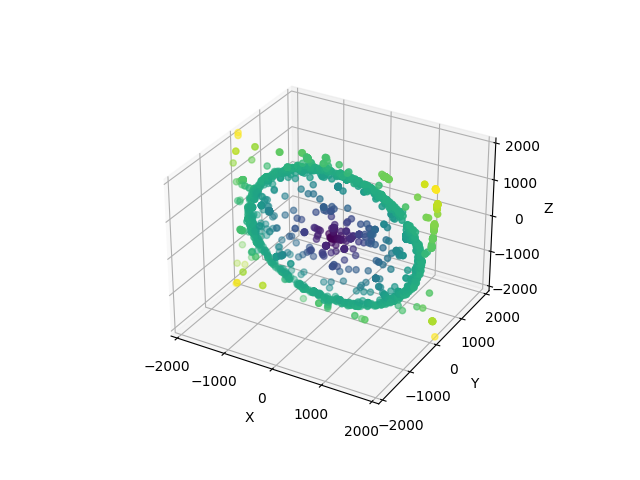

In [8]:
%matplotlib widget


import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(coords_x, coords_y, coords_z, c=(ly_to_center))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d(-2048, 2048)
ax.set_ylim3d(-2048, 2048)
ax.set_zlim3d(-2048, 2048)

plt.show()

In [30]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

plot_range = [-2048,2048]

fig = go.Figure(
    data=[go.Mesh3d(
        x=(df.X),
        y=(df.Z),
        z=(df.Y),
        opacity=0.5
        )]
        )

fig.update_layout(
    scene = dict(
        xaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,            
            ),
        yaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,
            ),
        zaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,
            ),
        ),
    template='plotly_dark',
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

In [39]:
pd.read_csv('reddit_star_systems.csv')

,Unnamed: 0,post_id,author_id,flair_text,subject,galaxy,update,url,address,body_index_h,sys_index_h,region_y_h,region_z_h,region_x_h,planet_index,sys_index,y,x,z,k_ly_from_center
0,4,muj1up,85ogpn3s,/3.35/Euclid/Planet,Planet,Euclid,3.35,https://i.redd.it/achtdzj9f9u61.png,403800D1A668,4,038,00,668,D1A,4,56,0,-741,1640,719
1,6,mug4th,5khq221f,/3.35/Euclid/Planet,Planet,Euclid,3.35,https://i.redd.it/fdr9ncimi8u61.png,41ED01414591,4,1ED,01,591,414,4,493,1,1044,1425,706
2,10,mtwpcc,7hjepf8v,/3.35/Euclid/Planet,Planet,Euclid,3.35,https://i.redd.it/h5evcyaak3u61.jpg,407903B93569,4,079,03,569,B93,4,121,3,-1132,1385,715
3,16,ms04ep,6rch38,/3.35/Euclid/Planet,Planet,Euclid,3.35,https://i.redd.it/7e0z7bejzht61.jpg,4191FD931FB3,4,191,FD,FB3,931,4,401,-2,-1742,-76,697
4,20,mr62te,ldqbfm9,/3.35/Euclid/Planet,Planet,Euclid,3.35,https://i.redd.it/e57veebe49t61.png,41ACFDFFAFF8,4,1AC,FD,FF8,FFA,4,428,-2,-5,-7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,8546,w643sp,3vaqvag7,/3.94/Euclid/Frigate,Frigate,Euclid,3.94,https://i.redd.it/3b7vh5vglbd91.jpg,110D02FFF008,1,10D,02,008,FFF,1,269,2,0,8,3
2488,8547,w63xom,gz2wjd2w,/3.94/Euclid/Frigate,Frigate,Euclid,3.94,https://i.redd.it/7c4s4501kbd91.jpg,1111F7551C31,1,111,F7,C31,551,1,273,-8,1361,-974,669
2489,8548,w5zrje,tdcj2,/3.94/Euclid/Frigate,Frigate,Euclid,3.94,https://i.redd.it/l83w230icad91.png,100B0017D6DC,1,00B,00,6DC,17D,1,11,0,381,1756,718
2490,8597,yittp4,6791l,/4/Euclid/Frigate,Frigate,Euclid,4,https://i.redd.it/kth8ecjri8x91.jpg,5079FF996064,5,079,FF,064,996,5,121,0,-1641,100,657


In [36]:
import plotly.express as px
import plotly.graph_objects as go
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')


plot_range = [-2048,2048]
fig = px.scatter_3d(
    df, 
    x='X', y='Y', z='Z',
    range_x=plot_range, range_y=plot_range, range_z=plot_range,
    color='ly_to_center', opacity=0.3, template='plotly_dark',
    color_continuous_scale=px.colors.sequential.Inferno_r,
    )

# tight layout
# fig.update_layout(
#     margin=dict(l=0, r=0, b=0, t=0),
#     xaxis=dict(showgrid=False),
#     yaxis=dict(showgrid=False),
#     )

fig.update_layout(
    showlegend=False, 
    title_text="",
    scene = dict(
        xaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,            
            ),
        yaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,
            ),
        zaxis = dict(
            showline=False,            
            showbackground=False,            
            showgrid=False,            
            showticklabels=False,            
            showaxeslabels=False,
            ),
        ),margin=dict(l=0, r=0, b=0, t=0),
        )

# fig.show()

In [112]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = df.X
y = df.Z
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
plt.show()

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [109]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(x=df.X, y=df.Z, z=z_data.values)])


fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))
fig.update_layout(
    title='Mt Bruno Elevation', autosize=False,
    scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()


AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))